In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

In [45]:
medical_insurance_rates = {
    'PPO': 188.0, 
    'UCHP': 96.0,
    'HDHP': 86.0,
    'dental': 29.67,
    'vision': 7.49,
}

life_insurance_rates = {
    '8x': 18.77,
    'accident': 9.80,
    'disability': 9.98,
}

def medical_insurance(plan = 'PPO'):
    return np.sum([medical_insurance_rates[x] for x in [plan, 'dental', 'vision']])
        
def life_insurance():
    return np.sum([life_insurance_rates[x] for x in ['8x', 'accident', 'disability']])

def get_net_income(medical_plan = 'PPO', gross = 5750., srp = 200.):
    med = medical_insurance(plan = medical_plan)
    lic = life_insurance()
    benefits = med + lic + srp
    fica_taxable = gross - med
    fed_taxable  = gross - med - lic - srp
    oasdi_medicare = fica_taxable * (0.062 + 0.0145)
    federal_withhold = fed_taxable * 0.155
    state_withhold = fed_taxable * 0.0495
    net_income = gross - benefits - oasdi_medicare - federal_withhold - state_withhold
    tax_withhold = federal_withhold + state_withhold
    return net_income, tax_withhold

def get_net_savings(medical_plan = 'PPO', gross = 5750., srp = 200.):
    income = get_net_income(medical_plan = medical_plan, gross = gross, srp = srp)
    return income + srp

In [46]:
get_net_income()

(3782.5934349999998, 1081.046305)

In [47]:
np.linspace(200, 400, 11)

array([200., 220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])

In [48]:
get_net_income(srp = np.linspace(200, 400, 11))

(array([3782.593435, 3766.683435, 3750.773435, 3734.863435, 3718.953435,
        3703.043435, 3687.133435, 3671.223435, 3655.313435, 3639.403435,
        3623.493435]),
 array([1081.046305, 1076.956305, 1072.866305, 1068.776305, 1064.686305,
        1060.596305, 1056.506305, 1052.416305, 1048.326305, 1044.236305,
        1040.146305]))

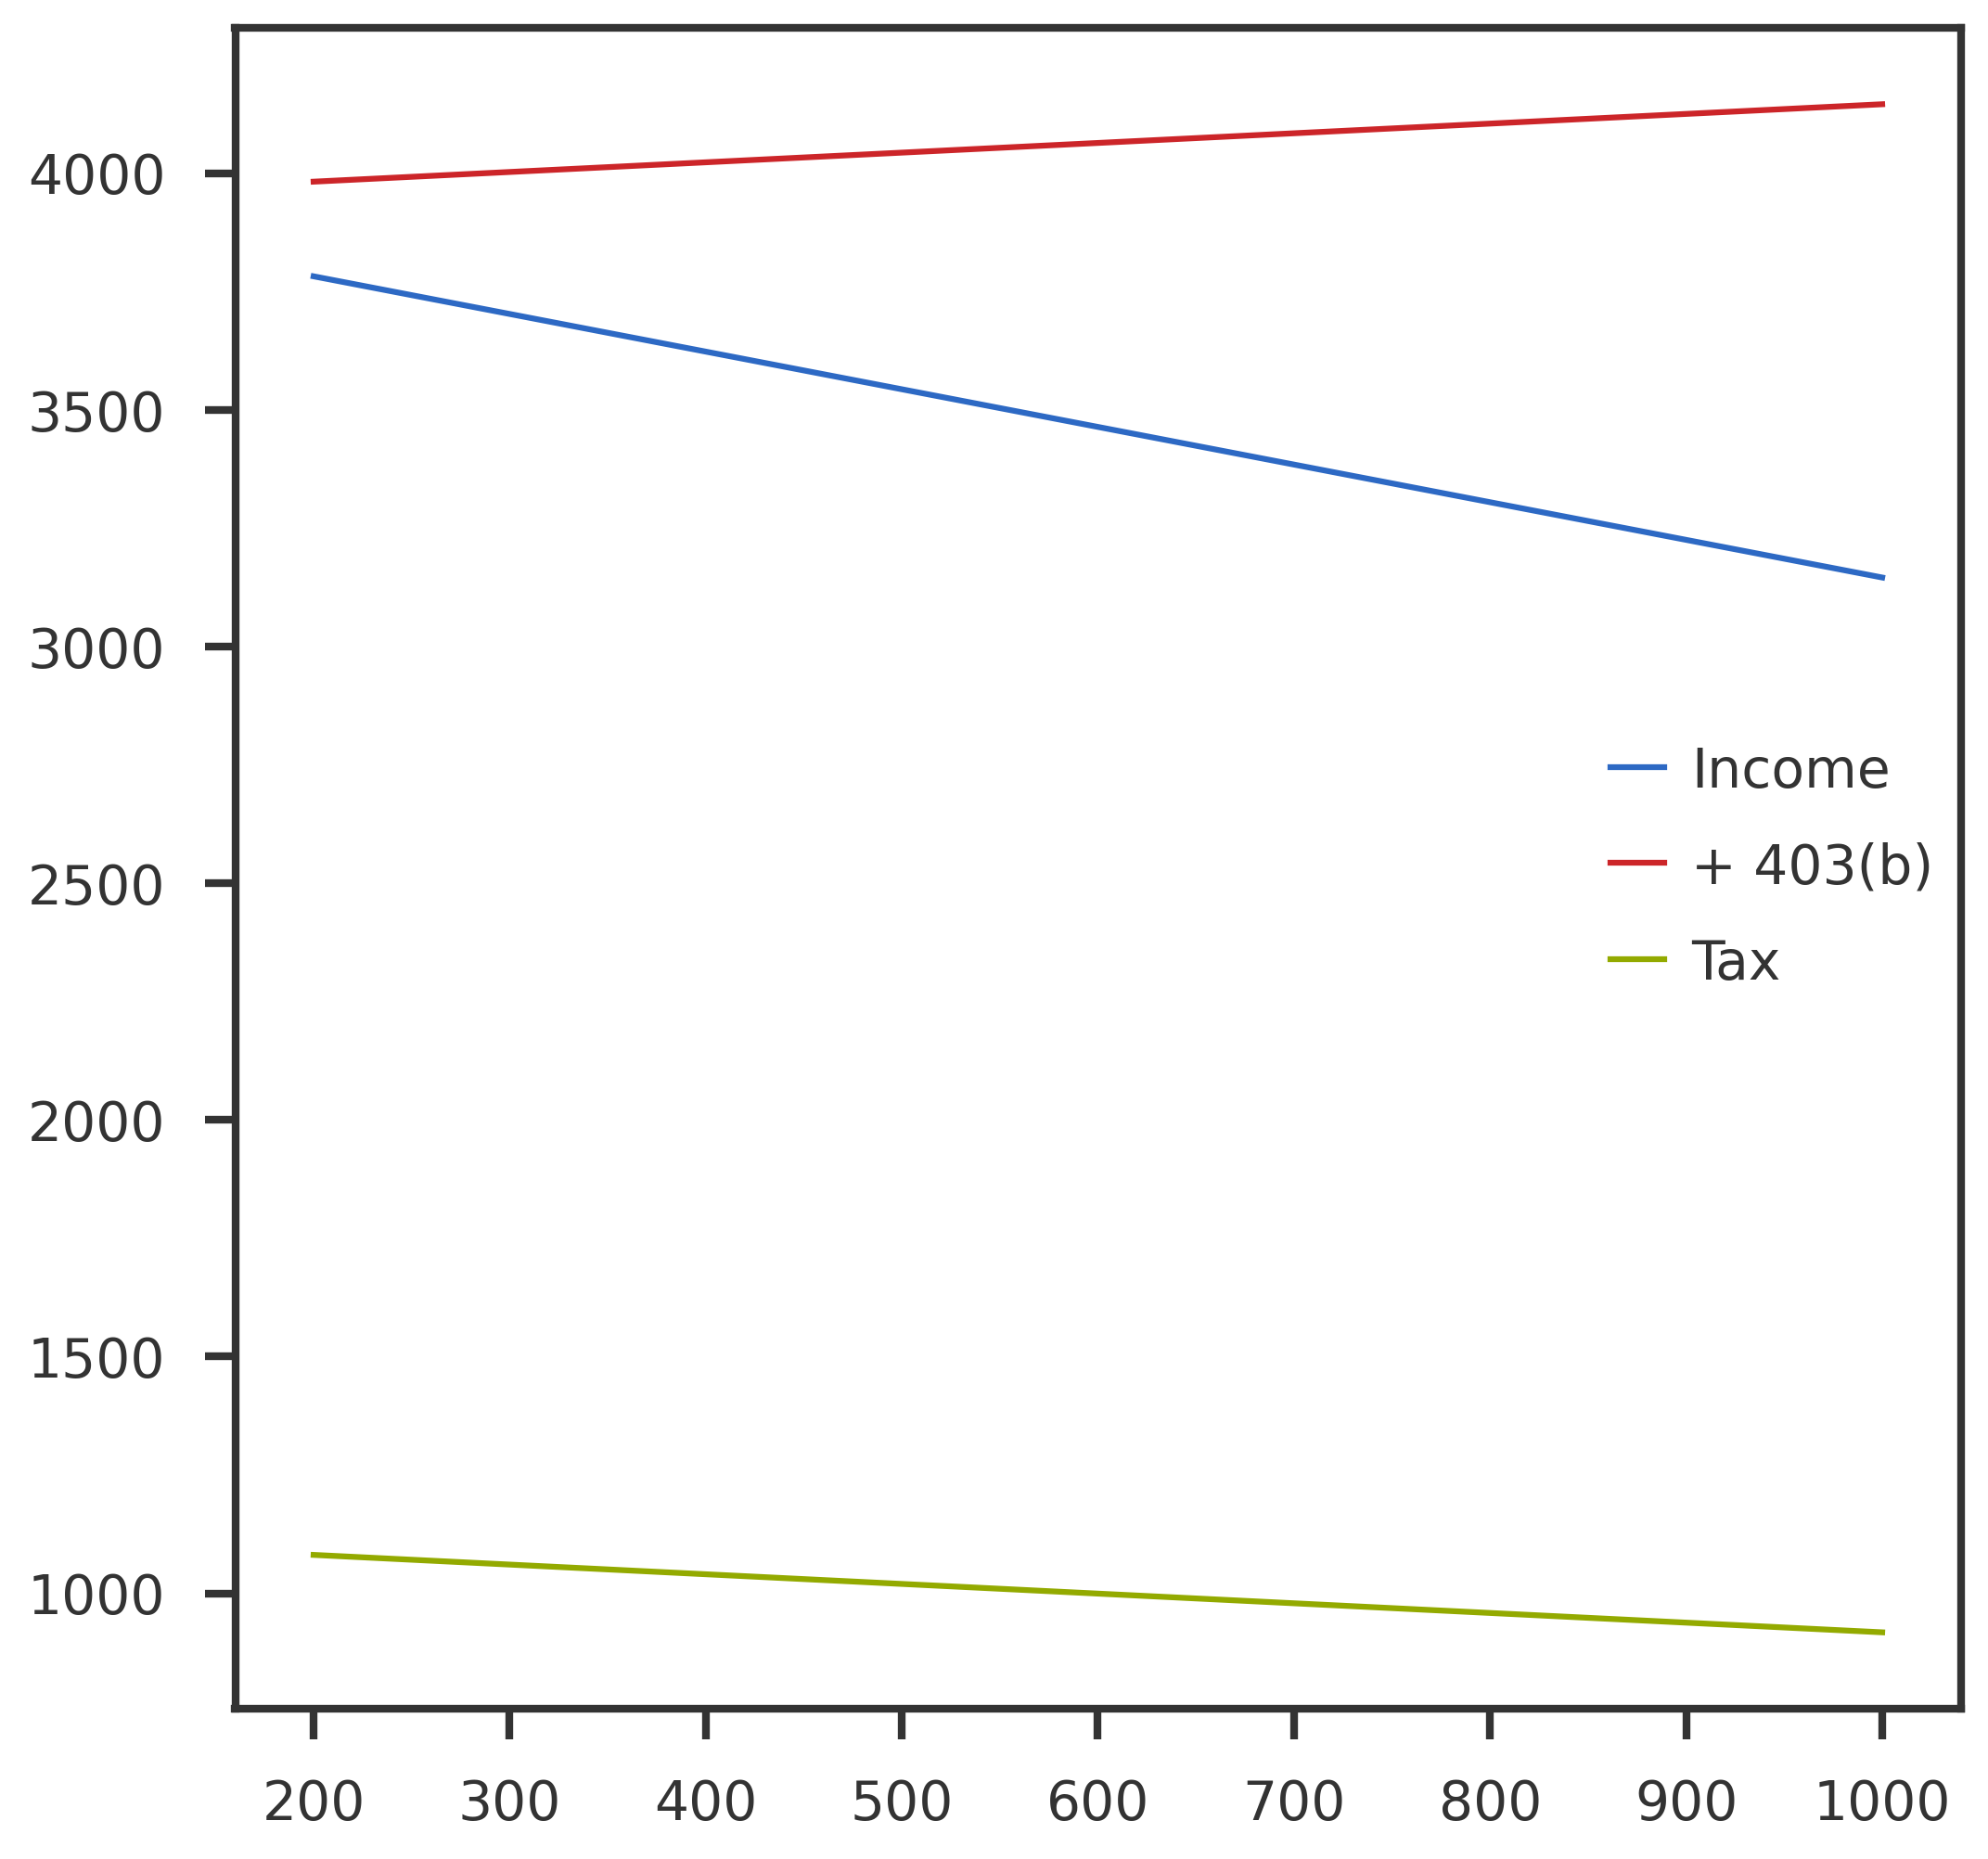

In [80]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

srp = np.linspace(200, 1000, 5)
income, tax_withhold = get_net_income(srp = srp)
savings = income + srp

gross = 5750.

ax1.plot(srp, income, label = 'Income')
ax1.plot(srp, savings, label = '+ 403(b)')
ax1.plot(srp, tax_withhold, label = 'Tax')

ax1.legend()
plt.show()